In [1]:
%matplotlib inline
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [2]:
import matplotlib.pyplot as plt
from dtrace.DTraceUtils import rpath
from dtrace.Associations import Association
from dtrace.Preliminary import DrugPreliminary, CrisprPreliminary

In [3]:
# ### Import data-sets
assoc = Association()

[2019-11-20 10:30:18,363 - INFO]: #(Samples)=484
[2019-11-20 10:30:19,778 - INFO]: #(Drugs)=480; #(Genes)=16643; #(Genomic)=519; 


## Principal Component Analysis (PCA)

Import PCA results performed on the drug-response and CRISPR-Cas9 data-sets both per drug/gene and per samples. Note
PCA is performed after running the first notebook (0.Associations).

In [4]:
pca_drug = assoc.drespo_obj.import_pca()
pca_crispr = assoc.crispr_obj.import_pca()

## Growth-rate correlation analysis

Correlation of cell lines growth rates (unperturbed) with drug-response (ln IC50).

In [5]:
g_corr = assoc.drespo_obj.perform_growth_corr(subset=assoc.samples)

[2019-11-20 10:30:20,262 - INFO]: Correlation with growth using 408 cell lines


Correlation of cell lines growth rates (unperturbed) with CRISPR-Cas9 (scaled log2 fold-change; median essential = -1)

In [6]:
c_corr = assoc.crispr_obj.perform_growth_corr(subset=assoc.samples)

[2019-11-20 10:30:21,540 - INFO]: Correlation with growth using 408 cell lines


# Drug-response

Drug-response (IC50s) measurements across cell lines cumulative distribution

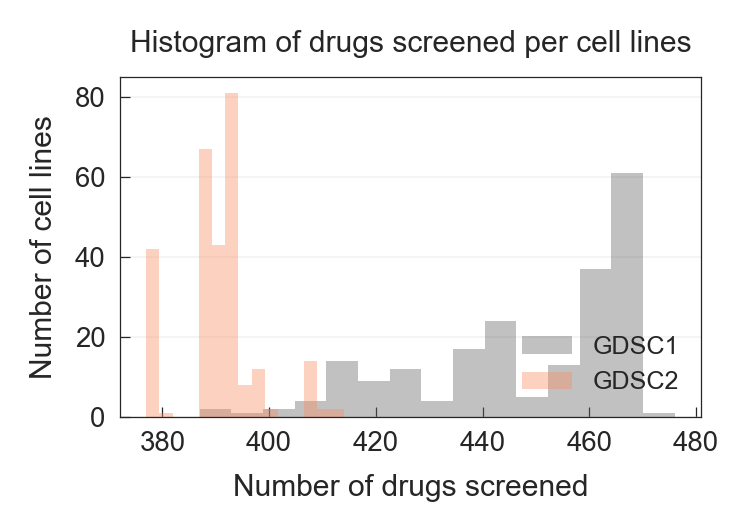

In [7]:
plt.figure(figsize=(2.5, 1.5), dpi=300)
DrugPreliminary.histogram_drug(assoc.drespo.count(1))
plt.savefig(
    f"{rpath}/preliminary_drug_histogram_drug.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Cumulative distribution of samples with measurements across all compounds screened

No handles with labels found to put in legend.


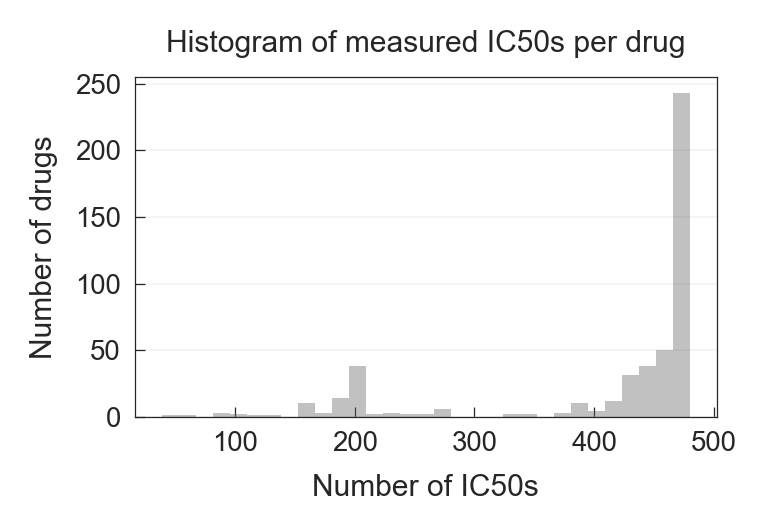

In [8]:
plt.figure(figsize=(2.5, 1.5), dpi=300)
DrugPreliminary.histogram_sample(assoc.drespo.count(0))
plt.savefig(
    f"{rpath}/preliminary_drug_histogram_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Principal components of drugs

/Users/eg14/miniconda3/envs/crispy/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


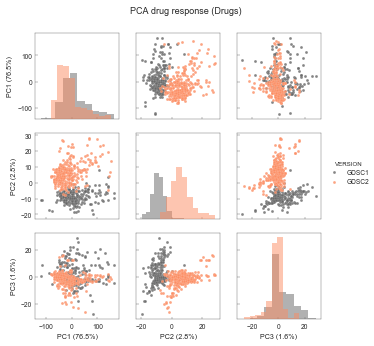

In [9]:
DrugPreliminary.pairplot_pca_by_rows(pca_drug)
plt.suptitle("PCA drug response (Drugs)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot.pdf", bbox_inches="tight", transparent=True
)
plt.show()

Principal components of samples in the drug-response

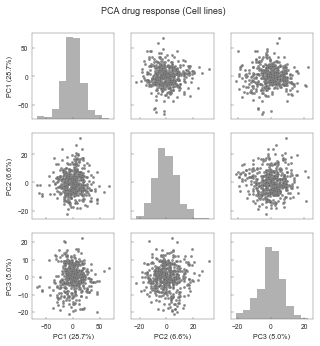

In [10]:
DrugPreliminary.pairplot_pca_by_columns(pca_drug)
plt.suptitle("PCA drug response (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Principal components of samples in the drug-response coloured by cancer type

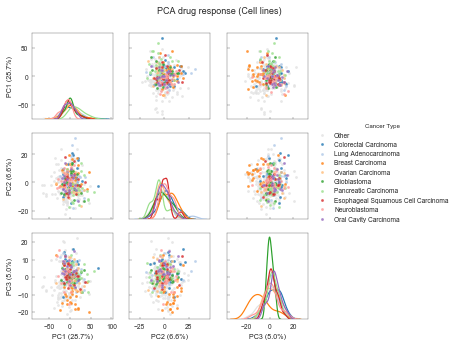

In [11]:
DrugPreliminary.pairplot_pca_samples_cancertype(
    pca_drug, assoc.samplesheet.samplesheet["cancer_type"]
)
plt.suptitle("PCA drug response (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot_cancertype.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Drug-response PCs correlation with growth-rates

In [12]:
plot_df = assoc.samplesheet.growth_corr(pca_drug["column"]["pcs"].T)

[2019-11-20 10:30:38,888 - INFO]: Correlation with growth using 408 cell lines


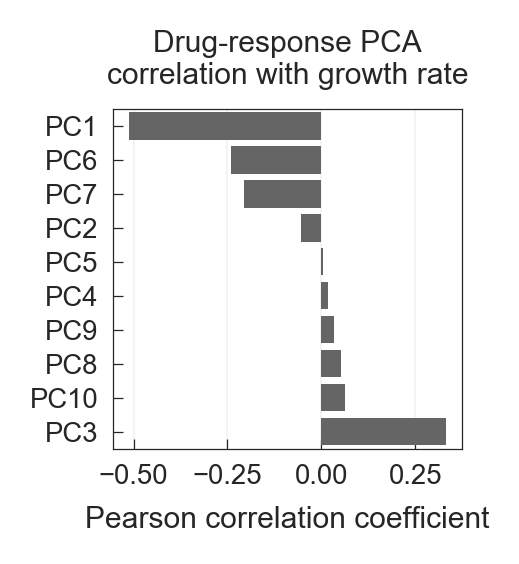

In [13]:
plt.figure(figsize=(1.5, 1.5), dpi=300)
DrugPreliminary.growth_corrs_pcs_barplot(plot_df)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_pcs_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Samples drug-response PC1 correlation with growth-rate

/Users/eg14/miniconda3/envs/crispy/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


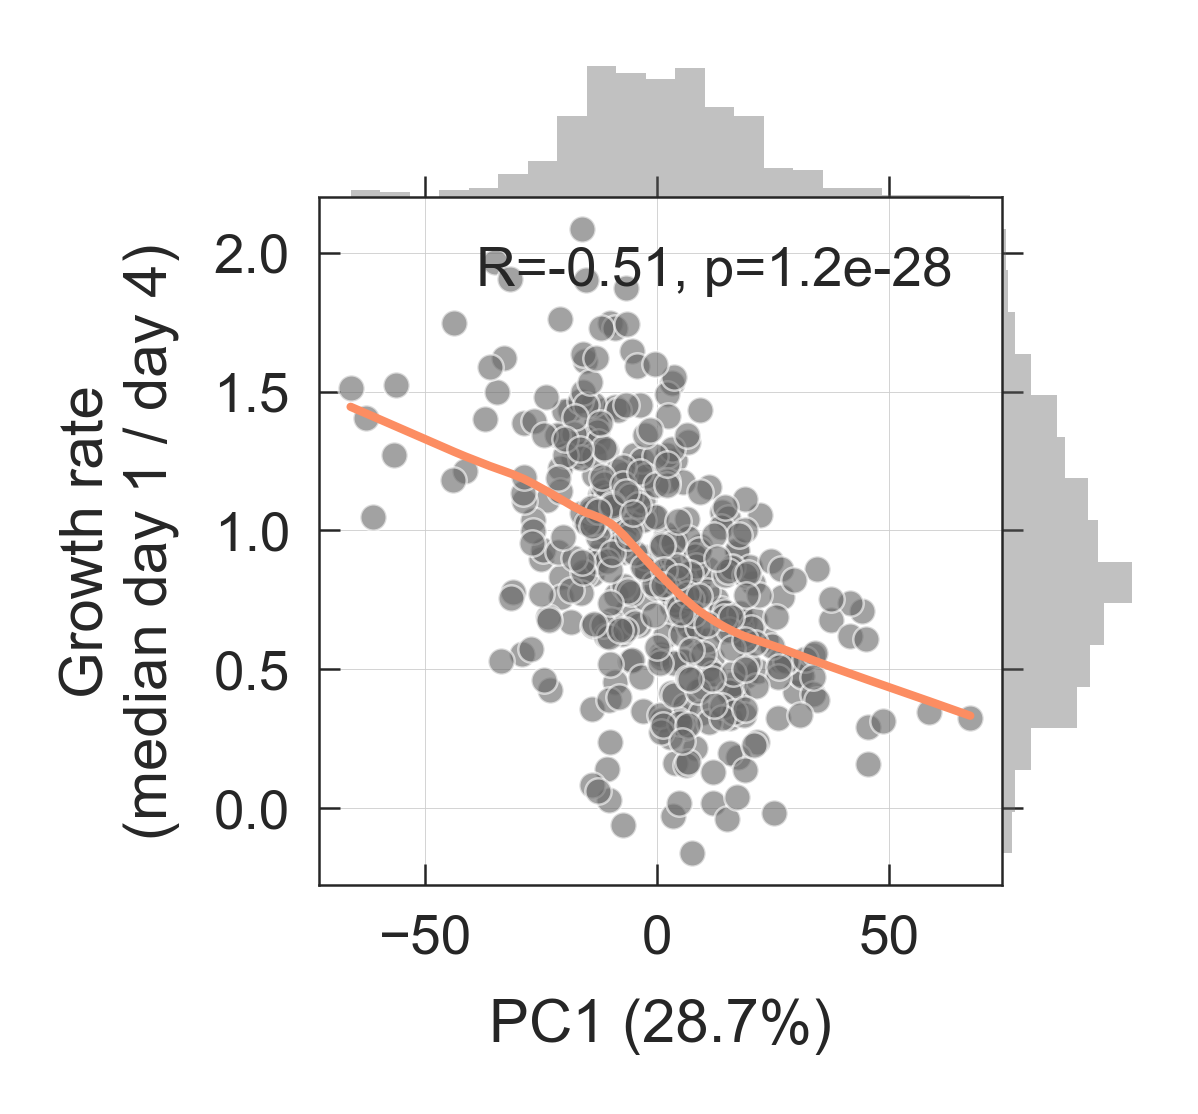

In [14]:
g = DrugPreliminary.corrplot_pcs_growth(
    pca_drug, assoc.samplesheet.samplesheet["growth"], "PC1"
)
g.fig.set_size_inches(1.5, 1.5)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Histogram of samples drug-response PC1 correlation with growth-rate

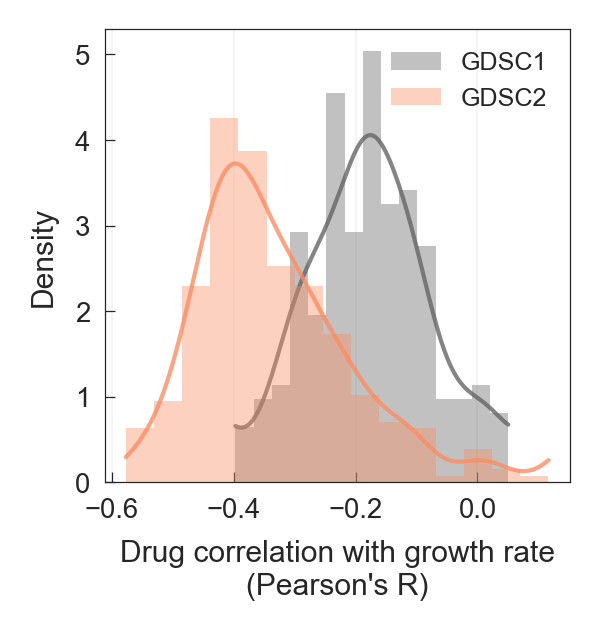

In [15]:
plt.figure(figsize=(2, 2), dpi=300)
DrugPreliminary.growth_correlation_histogram(g_corr)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Top correlated drugs with growth-rate

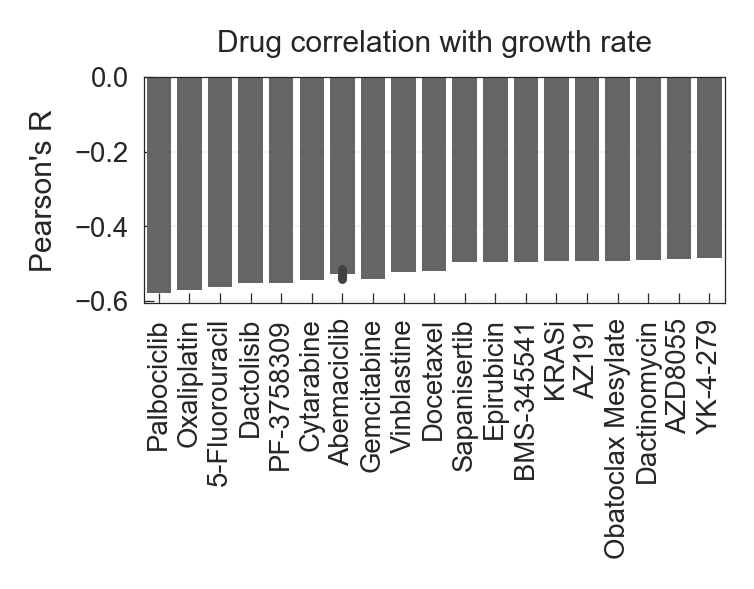

In [16]:
plt.figure(figsize=(2.5, 1), dpi=300)
DrugPreliminary.growth_correlation_top_drugs(g_corr)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot_top.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

# CRISPR-Cas9

Principal components of the genes in the CRISPR-Cas9 data-set

<Figure size 1200x1200 with 0 Axes>

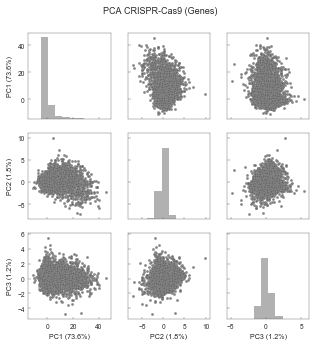

In [17]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_by_rows(pca_crispr, hue=None)
plt.suptitle("PCA CRISPR-Cas9 (Genes)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot.png",
    bbox_inches="tight",
    transparent=True,
    dpi=300,
)
plt.show()

Principal components of the samples in the CRISPR-Cas9 data-set

<Figure size 1200x1200 with 0 Axes>

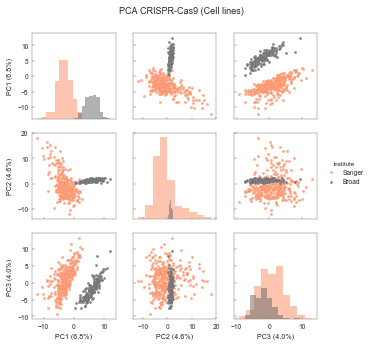

In [18]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_by_columns(
    pca_crispr, hue="institute", hue_vars=assoc.samplesheet.samplesheet["institute"]
)
plt.suptitle("PCA CRISPR-Cas9 (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Principal components of the samples in the CRISPR-Cas9 data-set coloured by cancer type

<Figure size 1200x1200 with 0 Axes>

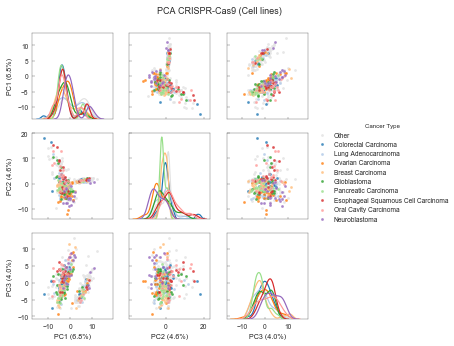

In [19]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_samples_cancertype(
    pca_crispr, assoc.samplesheet.samplesheet["cancer_type"]
)
plt.suptitle("PCA CRISPR-Cas9 (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot_cancertype.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Drug-response PCs correlation with growth-rates

[2019-11-20 10:30:56,276 - INFO]: Correlation with growth using 408 cell lines


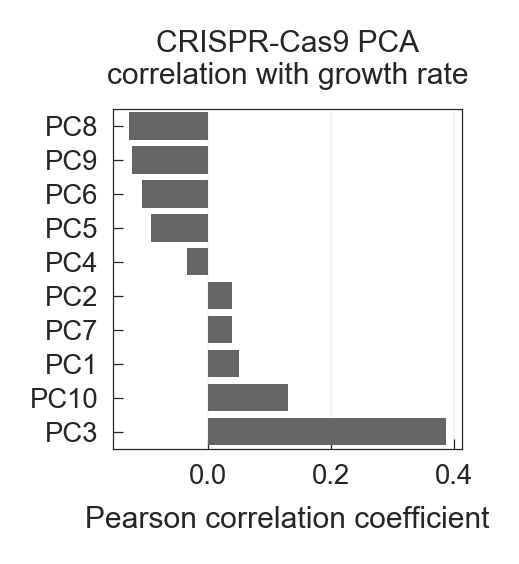

In [20]:
plt.figure(figsize=(1.5, 1.5), dpi=300)
plot_df = assoc.samplesheet.growth_corr(pca_crispr["column"]["pcs"].T)
CrisprPreliminary.growth_corrs_pcs_barplot(plot_df)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_growth_pcs_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

CRISPR samples principal component correlation with growth rates

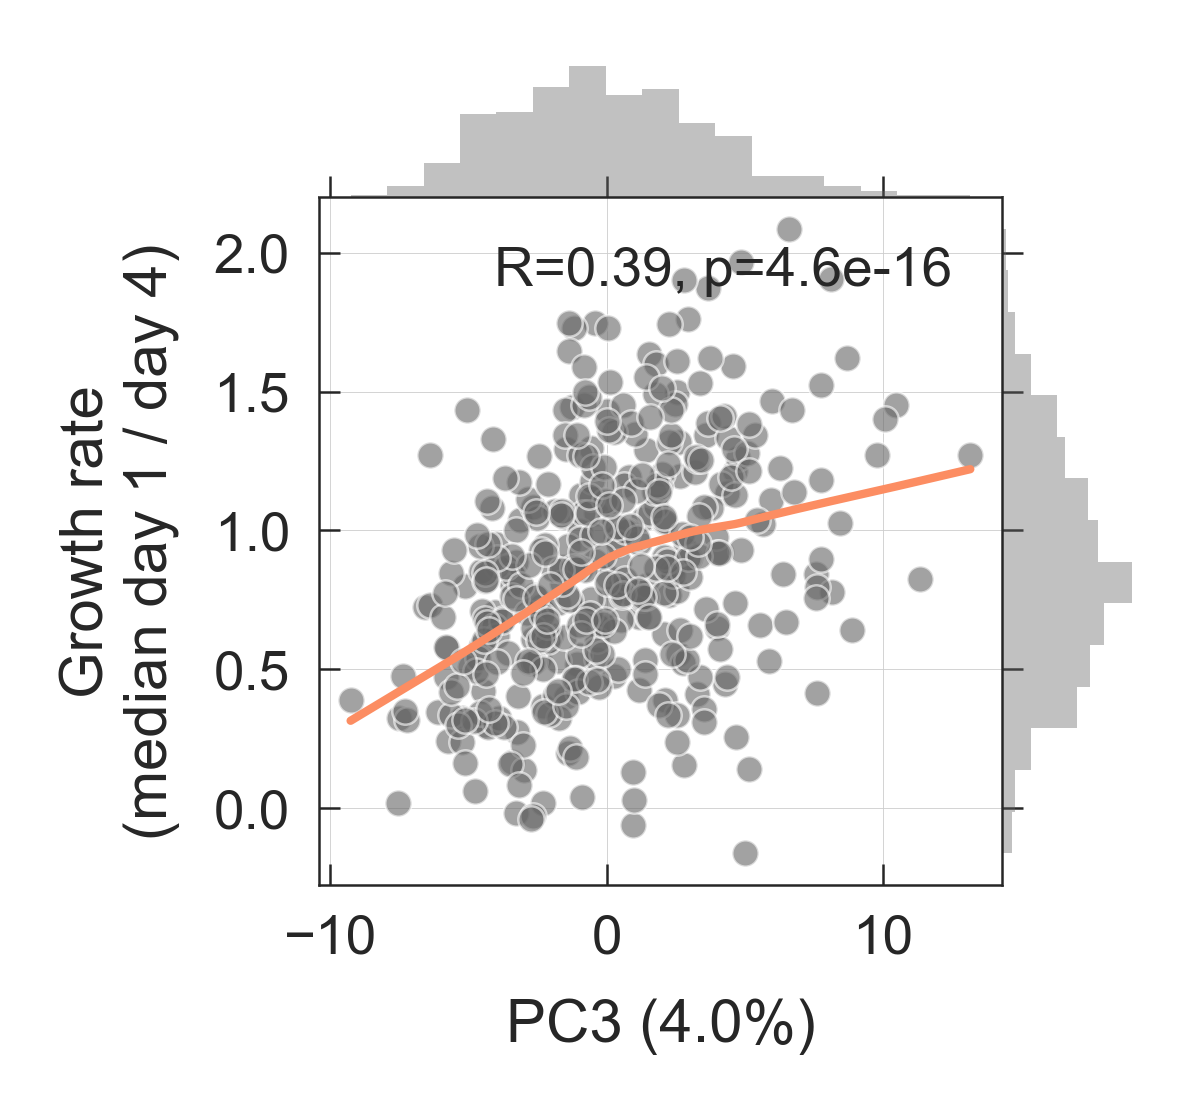

In [21]:
CrisprPreliminary.corrplot_pcs_growth(
    pca_crispr, assoc.samplesheet.samplesheet["growth"], "PC3"
)
plt.gcf().set_size_inches(1.5, 1.5)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_growth_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Copyright (C) 2019 Emanuel Goncalves